# DATA SCIENCE INTERN @BHARAT_INTERN
# Author : Tuhin Nath
# Task 2 : Titanic Classification

In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns


In [605]:

data = pd.read_csv("D:\\Bharat Intern\\titanic.csv")

In [606]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [607]:
data.shape

(418, 12)

In [608]:
data.isnull().sum().sort_values().reset_index()

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,SibSp,0
6,Parch,0
7,Ticket,0
8,Embarked,0
9,Fare,1


In [609]:
data1=data.drop('Cabin' , axis=1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [610]:
mean_ages_by_pclass = data.groupby('Pclass')['Age'].mean()

print(mean_ages_by_pclass)

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


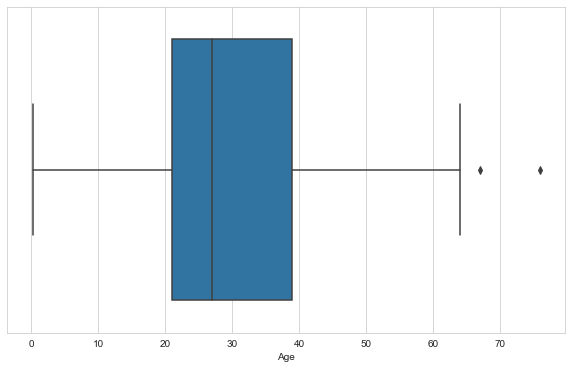

In [675]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Age'] )
plt.show()

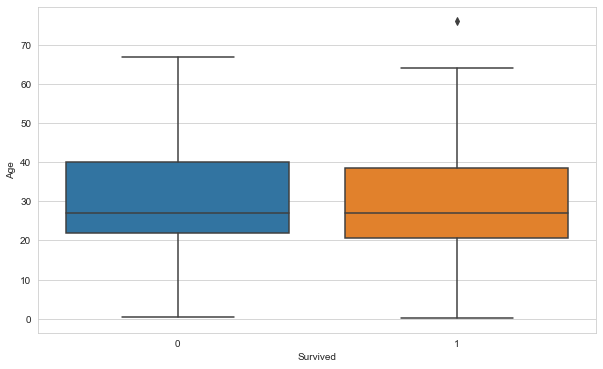

In [670]:
plt.figure(figsize=(10,6))
sns.boxplot(data, x='Survived' , y='Age' )
plt.show()

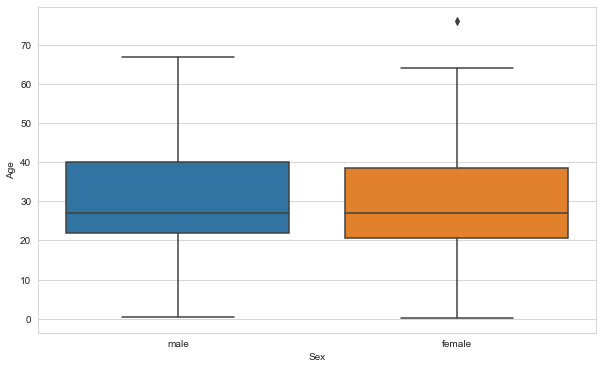

In [669]:
plt.figure(figsize=(10,6))
sns.boxplot(data, x='Sex' , y='Age' )
plt.show()

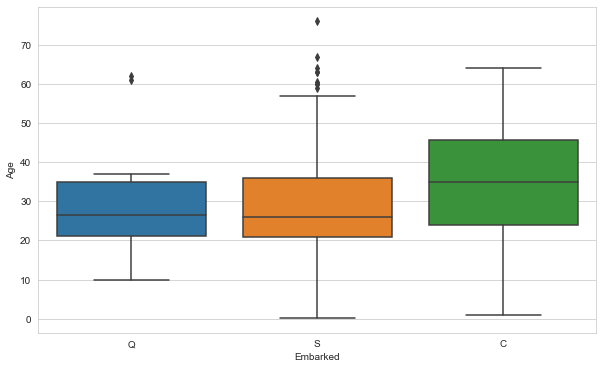

In [668]:
plt.figure(figsize=(10,6))
sns.boxplot(data, x='Embarked' , y='Age' )
plt.show()

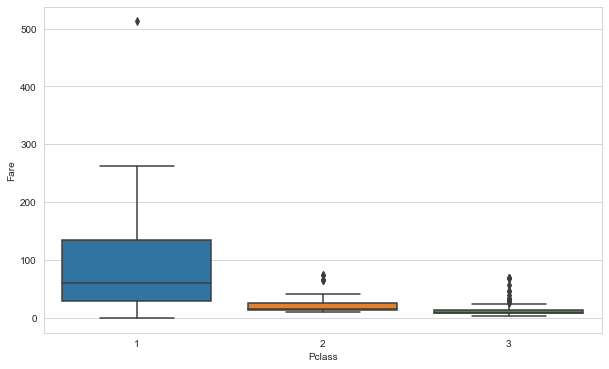

In [667]:
plt.figure(figsize=(10,6))
sns.boxplot(data, x='Pclass' , y='Fare' )
plt.show()

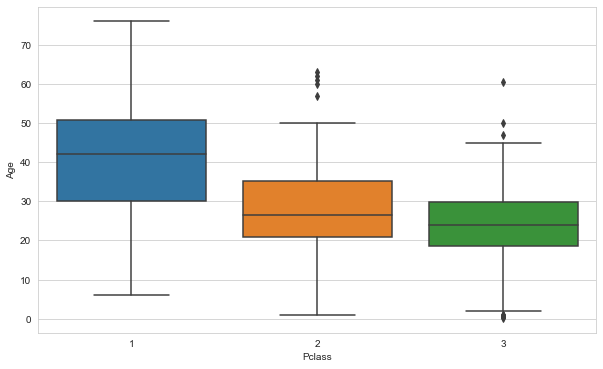

In [611]:
plt.figure(figsize=(10,6))
sns.boxplot(data, x='Pclass' , y='Age' )
plt.show()

In [612]:
mean_age_class1 = data1[data1['Pclass'] == 1]['Age'].mean()

mean_age_class2 = data1[data1['Pclass'] == 2]['Age'].mean()

mean_age_class3 = data1[data1['Pclass'] == 3]['Age'].mean()
print(mean_age_class1 , mean_age_class2 ,mean_age_class3)

40.91836734693877 28.7775 24.02794520547945


In [613]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40.91836734693877 

        elif Pclass == 2:
            return 28.7775 

        else:
            return 24.02794520547945

    else:
        return Age

In [614]:
data1['Age'] = data1[['Age','Pclass']].apply(impute_age,axis=1)

In [615]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [616]:
df = data1.dropna(subset=['Fare'] , axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,S


In [617]:
df.shape

(417, 11)

In [618]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [619]:
survived= df['Survived'].value_counts()
survived.reset_index()

,Survived,count
0,0,265
1,1,152


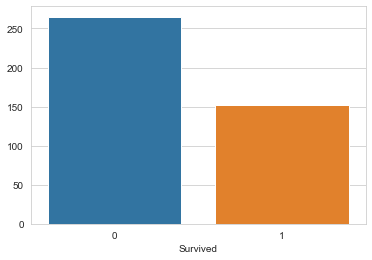

In [620]:
sns.barplot( x=survived.index , y=survived.values )
plt.show()

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [622]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,29.333729,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.890432,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [623]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

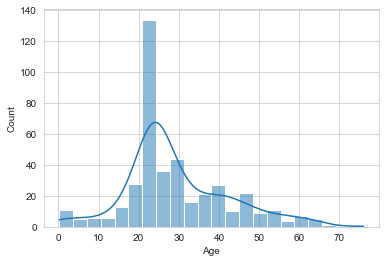

In [624]:
sns.histplot(df["Age"] , kde= True)

<Axes: xlabel='Fare', ylabel='Count'>

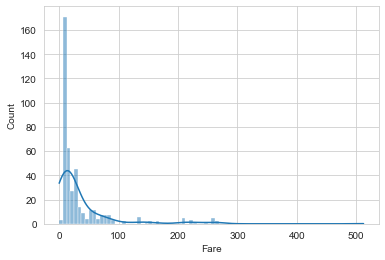

In [625]:
sns.histplot(df["Fare"] , kde= True)

<Axes: xlabel='Pclass', ylabel='Count'>

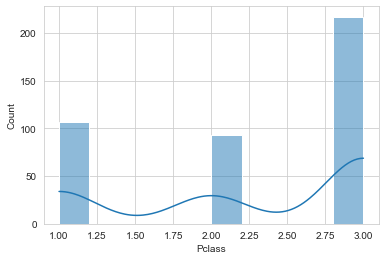

In [626]:
sns.histplot(df["Pclass"] , kde= True)

<Axes: xlabel='Survived', ylabel='count'>

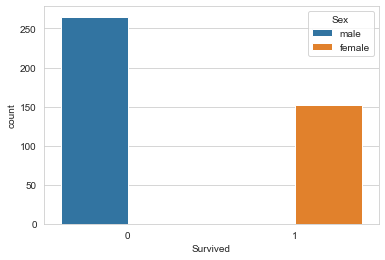

In [628]:
sns.countplot(x='Survived',hue='Sex')

In [629]:
pclass = df.groupby('Pclass')['Survived'].value_counts()

pclass

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           145
        1            72
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

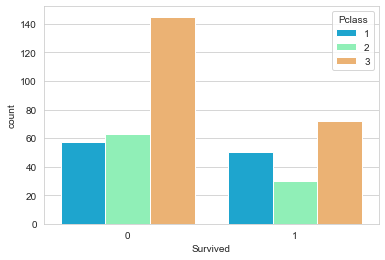

In [630]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')


<Axes: xlabel='Survived', ylabel='count'>

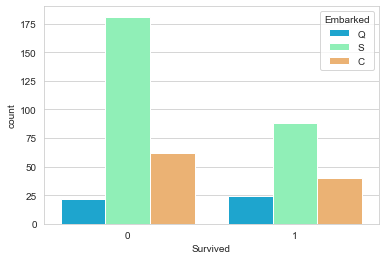

In [631]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')




<Axes: xlabel='Sex', ylabel='count'>

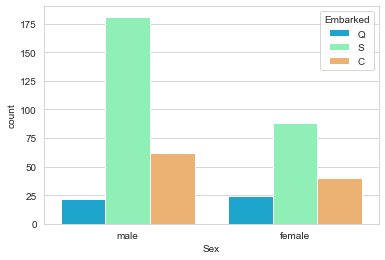

In [632]:
sns.countplot(x='Sex',hue='Embarked',data=df,palette='rainbow')


In [633]:
# Group by 'Age' and calculate the count of 'Survived' equal to 0 in each group
ages_survived_0_counts = df[df['Survived'] == 0].groupby('Age').size()

# Print the result
ages_survived_0_counts

Age
0.33     1
0.75     1
0.83     1
2.00     1
5.00     1
        ..
61.00    2
62.00    1
63.00    1
64.00    1
67.00    1
Length: 69, dtype: int64

<Axes: xlabel='Age'>

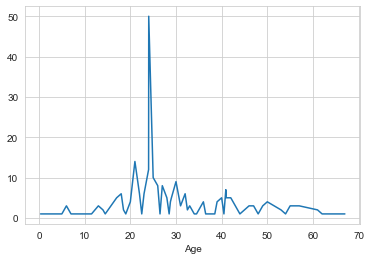

In [634]:
sns.lineplot(ages_survived_0_counts , x=ages_survived_0_counts.index , y=ages_survived_0_counts.values)

Most of the non-survival people belong to the age between 20 to 30.

In [635]:
ages_survived_1_counts = df[df['Survived'] == 1].groupby('Age').size()

# Print the result
ages_survived_1_counts.sort_values

<bound method Series.sort_values of Age
0.170000      1
0.920000      1
1.000000      3
2.000000      1
3.000000      1
8.000000      1
9.000000      1
10.000000     1
12.000000     2
15.000000     1
16.000000     2
17.000000     2
18.000000     7
18.500000     1
19.000000     3
20.000000     4
21.000000     3
22.000000    10
23.000000     5
24.000000     5
24.027945    22
25.000000     1
26.000000     4
27.000000     4
28.000000     2
28.777500     1
29.000000     5
30.000000     6
31.000000     3
33.000000     3
35.000000     3
36.000000     5
37.000000     2
38.000000     2
39.000000     2
40.918367     2
43.000000     1
45.000000     7
47.000000     2
48.000000     4
50.000000     1
51.000000     1
53.000000     1
54.000000     1
55.000000     3
58.000000     1
59.000000     1
60.000000     3
63.000000     1
64.000000     2
76.000000     1
dtype: int64>

<Axes: xlabel='Age'>

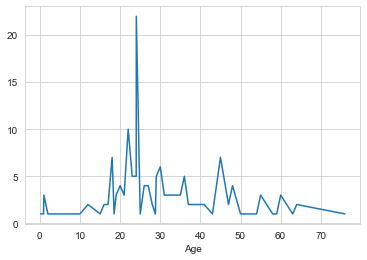

In [636]:
sns.lineplot(ages_survived_1_counts , x=ages_survived_1_counts.index , y=ages_survived_1_counts.values)

In [637]:
pclass_survived_0_counts = df[df['Survived'] == 0].groupby('Pclass').size()
pclass_survived_0_counts

Pclass
1     57
2     63
3    145
dtype: int64

Most of the non-survival people belongs to Pclass 3.

In [638]:

# Get dummy variables with drop_first=True
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

# Convert dummy variables to integers (0/1)
sex = sex.astype(int)
embark = embark.astype(int)

# Print the results
print(sex)
print(embark)


     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[417 rows x 1 columns]
     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[417 rows x 2 columns]


In [639]:
df = pd.concat([df,sex,embark],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.027945,0,0,A.5. 3236,8.0500,S,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1
416,1308,0,3,"Ware, Mr. Frederick",male,24.027945,0,0,359309,8.0500,S,1,0,1


In [640]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [641]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.500000,0,0,7.8292,1,1,0
1,893,1,3,47.000000,1,0,7.0000,0,0,1
2,894,0,2,62.000000,0,0,9.6875,1,1,0
3,895,0,3,27.000000,0,0,8.6625,1,0,1
4,896,1,3,22.000000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,24.027945,0,0,8.0500,1,0,1
414,1306,1,1,39.000000,0,0,108.9000,0,0,0
415,1307,0,3,38.500000,0,0,7.2500,1,0,1
416,1308,0,3,24.027945,0,0,8.0500,1,0,1


In [642]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.024117,-0.025800,-0.040524,0.003259,0.042650,0.008211,0.024117,-0.036141,0.048884
Survived,-0.024117,1.000000,-0.107203,0.009711,0.099136,0.158534,0.191514,-1.000000,0.115033,-0.104681
Pclass,-0.025800,-0.107203,1.000000,-0.537558,0.002136,0.019581,-0.577147,0.107203,0.253614,0.119420
Age,-0.040524,0.009711,-0.537558,1.000000,-0.076626,-0.052944,0.352327,-0.009711,-0.073089,-0.100184
SibSp,0.003259,0.099136,0.002136,-0.076626,1.000000,0.306566,0.171539,-0.099136,-0.099290,0.080331
Parch,0.042650,0.158534,0.019581,-0.052944,0.306566,1.000000,0.230046,-0.158534,-0.133330,0.092990
Fare,0.008211,0.191514,-0.577147,0.352327,0.171539,0.230046,1.000000,-0.191514,-0.155562,-0.178582
male,0.024117,-1.000000,0.107203,-0.009711,-0.099136,-0.158534,-0.191514,1.000000,-0.115033,0.104681
Q,-0.036141,0.115033,0.253614,-0.073089,-0.099290,-0.133330,-0.155562,-0.115033,1.000000,-0.474720
S,0.048884,-0.104681,0.119420,-0.100184,0.080331,0.092990,-0.178582,0.104681,-0.474720,1.000000


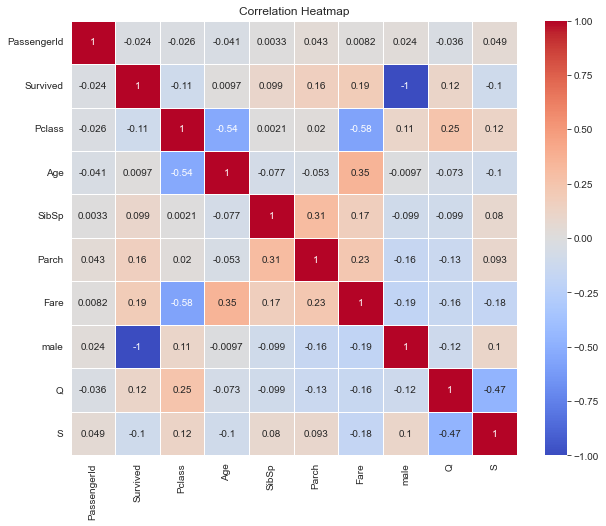

In [643]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 3600x3600 with 0 Axes>

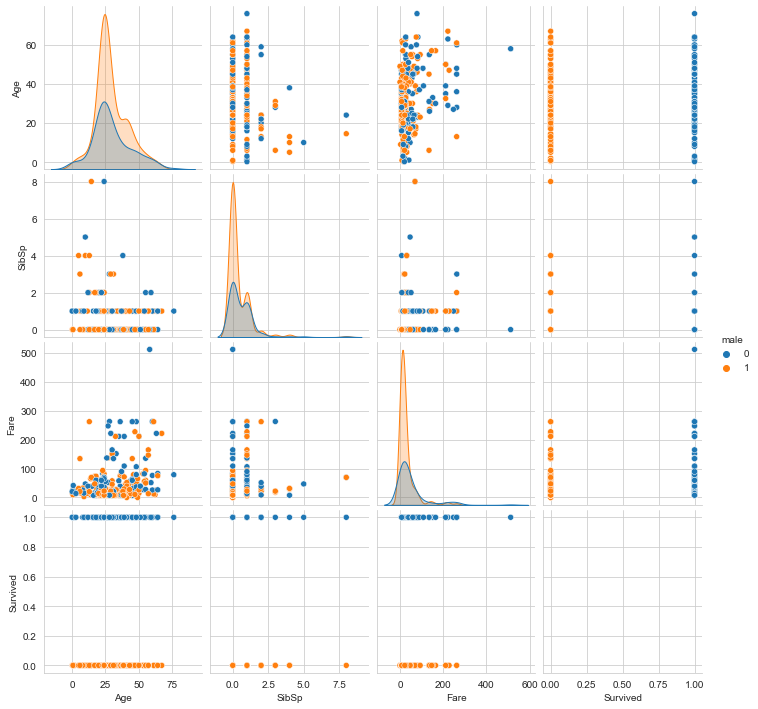

In [648]:
plt.figure(figsize=(50,50))

sns.pairplot(df, vars=['Age', 'SibSp', 'Fare','Survived'] , hue='male', kind='scatter')
plt.show()


In [649]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived'],axis=1)
Y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'],axis=1), train['Survived'], test_size=0.30, random_state=42)

In [650]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
75,967,1,32.500000,0,0,211.5000,1,0,0
131,1023,1,53.000000,0,0,28.5000,1,0,0
266,1158,1,40.918367,0,0,0.0000,1,0,1
269,1161,3,17.000000,0,0,8.6625,1,0,1
194,1086,2,8.000000,0,2,32.5000,1,0,1
...,...,...,...,...,...,...,...,...,...
71,963,3,21.000000,0,0,7.8958,1,0,1
106,998,3,21.000000,0,0,7.8208,1,1,0
271,1163,3,24.027945,0,0,7.7500,1,1,0
349,1241,2,31.000000,0,0,21.0000,0,0,1


In [651]:
y_train

75     0
131    0
266    0
269    0
194    0
      ..
71     0
106    0
271    0
349    1
102    0
Name: Survived, Length: 291, dtype: int64

In [652]:
X_test.shape

(126, 9)

In [653]:
y_test.shape

(126,)

In [654]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [655]:
pred1 = lr.predict(X_test)
pred1

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [656]:
from sklearn.metrics import accuracy_score


In [657]:
print(accuracy_score(y_test, pred1))

1.0


In [658]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [659]:
pred2=rf.predict(X_test)
pred2

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [660]:
print(accuracy_score(y_test,pred2))

1.0


In [661]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [662]:
pred3 = xgb.predict(X_test)
pred3

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [666]:
print(accuracy_score(y_test,pred3))

1.0


In [681]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [682]:
pred4=dtc.predict(X_test)
pred4

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [683]:
print(accuracy_score(pred4,y_test))

1.0
